# Apple Stock Price Prediction using LSTM

We are creating an LSTM model to forecast Apple stock prices for next 6 months (Dec 2021 - May 2022)

## Data

About the data, it has been taken from Yahoo Finance website (https://finance.yahoo.com/quote/AAPL) and data contains values from 02-01-1990 to 30-11-2021

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/MyDrive/AAPL.csv"
path = "/content/drive/MyDrive/AAPL.csv"

/content/drive/MyDrive/AAPL.csv


In [4]:
data = pd.read_csv(path)

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-1990,0.314732,0.334821,0.312500,0.332589,0.266423,183198400
1,03-01-1990,0.339286,0.339286,0.334821,0.334821,0.268211,207995200
2,04-01-1990,0.341518,0.345982,0.332589,0.335938,0.269106,221513600
3,05-01-1990,0.337054,0.341518,0.330357,0.337054,0.270000,123312000
4,08-01-1990,0.334821,0.339286,0.330357,0.339286,0.271788,101572800
...,...,...,...,...,...,...,...
8037,23-11-2021,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
8038,24-11-2021,160.750000,162.139999,159.639999,161.940002,161.940002,69463600
8039,26-11-2021,159.570007,160.449997,156.360001,156.809998,156.809998,76959800
8040,29-11-2021,159.369995,161.190002,158.789993,160.240005,160.240005,88748200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8042 entries, 0 to 8041
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8042 non-null   object 
 1   Open       8042 non-null   float64
 2   High       8042 non-null   float64
 3   Low        8042 non-null   float64
 4   Close      8042 non-null   float64
 5   Adj Close  8042 non-null   float64
 6   Volume     8042 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 439.9+ KB


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8042.000000,8042.000000,8042.000000,8042.000000,8042.000000,8.042000e+03
mean,16.351917,16.525066,16.178668,16.358983,15.594377,3.831832e+08
std,29.698129,30.021799,29.380971,29.717860,29.448485,3.633095e+08
min,0.114955,0.118304,0.113839,0.115513,0.099037,2.396800e+06
25%,0.367266,0.375000,0.358929,0.367188,0.308923,1.478439e+08
50%,2.111071,2.138393,2.058393,2.106428,1.805978,2.664242e+08
75%,21.204196,21.363661,20.989554,21.170268,18.389792,4.808804e+08
max,161.679993,165.699997,161.000000,165.300003,165.300003,7.421641e+09


In [8]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [9]:
data['Avg_price'] = data[['High','Low']].mean(axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_price
0,1990-01-02,0.314732,0.334821,0.312500,0.332589,0.266423,183198400,0.323661
1,1990-01-03,0.339286,0.339286,0.334821,0.334821,0.268211,207995200,0.337054
2,1990-01-04,0.341518,0.345982,0.332589,0.335938,0.269106,221513600,0.339286
3,1990-01-05,0.337054,0.341518,0.330357,0.337054,0.270000,123312000,0.335938
4,1990-01-08,0.334821,0.339286,0.330357,0.339286,0.271788,101572800,0.334821


In [10]:
data.drop(['Open','Close','High','Low','Volume','Adj Close'], axis=1, inplace=True)
data.head()

,Date,Avg_price
0,1990-01-02,0.323661
1,1990-01-03,0.337054
2,1990-01-04,0.339286
3,1990-01-05,0.335938
4,1990-01-08,0.334821


In [11]:
data.set_index('Date', inplace=True)
data.head()

,Avg_price
Date,
1990-01-02,0.323661
1990-01-03,0.337054
1990-01-04,0.339286
1990-01-05,0.335938
1990-01-08,0.334821


Text(0, 0.5, 'Price')

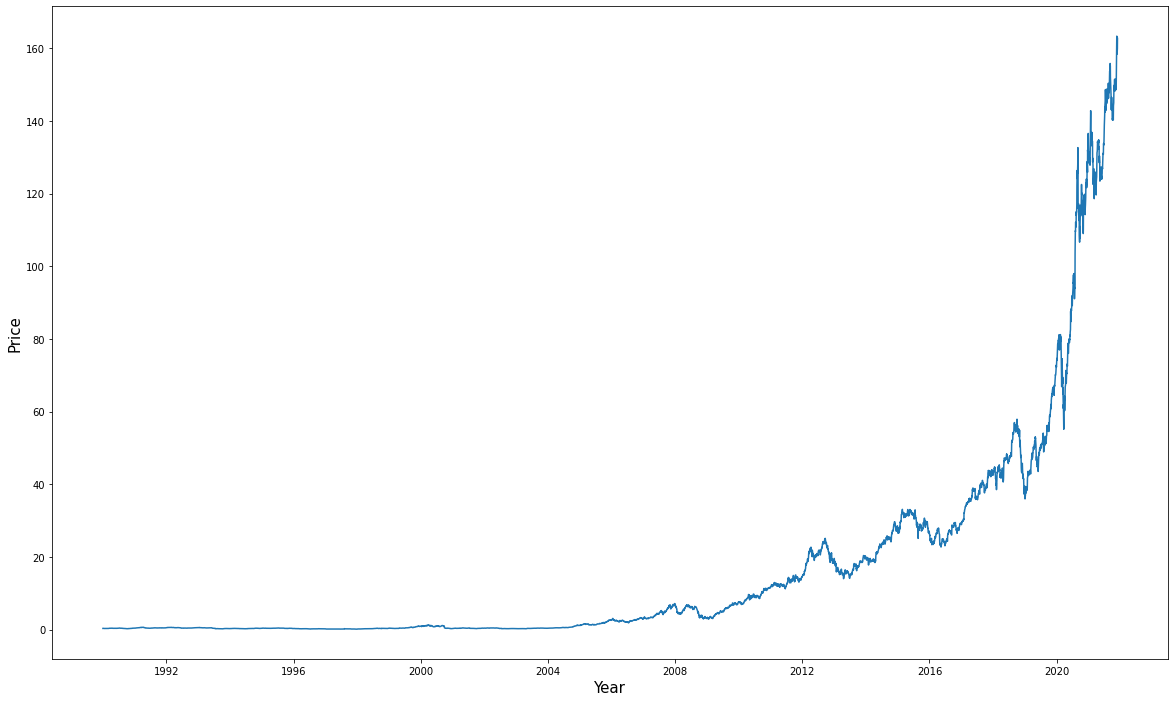

In [12]:
plt.figure(figsize=(20,12))
plt.plot(data)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)

It can be seen that from 1990 to 2009, the stock value seems almost constant, it is better to take the data 2009 onwards and make a model with that data

In [13]:
data.loc['1990-01-02']

Avg_price    0.323661
Name: 1990-01-02 00:00:00, dtype: float64

In [14]:
data.loc['2009-01-02']

Avg_price    3.146429
Name: 2009-01-02 00:00:00, dtype: float64

In [15]:
data.loc['2010-01-04']

Avg_price    7.622857
Name: 2010-01-04 00:00:00, dtype: float64

In [16]:
data.loc['2011-01-03']

Avg_price    11.698214
Name: 2011-01-03 00:00:00, dtype: float64

In [17]:
len(data.loc['1990-01-02':'2009-01-02'])

4792

In [18]:
data = data.iloc[4792:]
data

,Avg_price
Date,
2009-01-05,3.373036
2009-01-06,3.385000
2009-01-07,3.263571
2009-01-08,3.271250
2009-01-09,3.277143
...,...
2021-11-23,160.430001
2021-11-24,160.889999
2021-11-26,158.404999


Text(0, 0.5, 'Price')

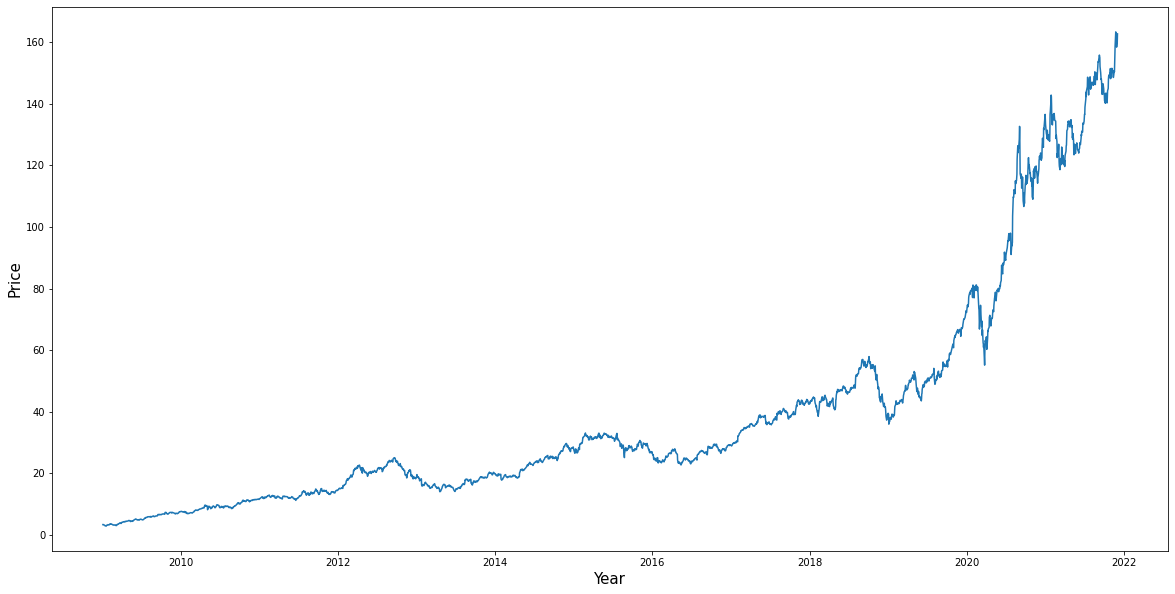

In [19]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price', fontsize=15)

In [20]:
len(data)

3250

In [21]:
# Days in a year
len(data.loc['2009-01-05':'2010-01-05'])

253

In [22]:
len(data.loc['2011-01-05':'2012-01-04'])

252

## Splitting into train and test data

Split the data into a train/test where the test set is the last 6 months of data.


In [23]:
data.index

DatetimeIndex(['2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-12', '2009-01-13', '2009-01-14',
               '2009-01-15', '2009-01-16',
               ...
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-26',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='Date', length=3250, freq=None)

In [24]:
len(data.loc['2021-05-30':'2021-11-30'])

128

In [25]:
test_size = 128
cutoff = len(data)- test_size

In [26]:
train = data.iloc[:cutoff]
test = data.iloc[cutoff:]

In [27]:
len(train)

3122

In [28]:
len(test)

128

## Scale Data

Use a MinMaxScaler to scale the train and test sets into scaled versions.

In [29]:
scaler = MinMaxScaler()

In [30]:
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [31]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

Create a TimeSeriesGenerator object based off the scaled_train data. length should be eual to the number that can capture the seasonality or patten or behaviour how prices increase or decrese in a cycle.

In [32]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 126 #(6 months days considering 252 average days in a year)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=32)

## Create the Model

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()
n_features = 1

model.add(LSTM(100, input_shape=(length, n_features), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(25))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [35]:
X,y = generator[0]

In [36]:
X.shape

(32, 126, 1)

In [37]:
y.shape

(32, 1)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 126, 100)          40800     
                                                                 
 dropout (Dropout)           (None, 126, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 126, 50)           30200     
                                                                 
 dropout_1 (Dropout)         (None, 126, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 25)                7600      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense (Dense)               (None, 1)                 2

In [39]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=32)

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [41]:
# fit model
model.fit_generator(generator,epochs=40,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/40
94/94 [==============================] - 26s 218ms/step - loss: 0.0133 - val_loss: 0.0392
Epoch 2/40
94/94 [==============================] - 19s 205ms/step - loss: 0.0134 - val_loss: 0.0461
Epoch 3/40
94/94 [==============================] - 20s 209ms/step - loss: 0.0055 - val_loss: 0.0642
Epoch 4/40
94/94 [==============================] - 20s 213ms/step - loss: 0.0024 - val_loss: 0.0235
Epoch 5/40
94/94 [==============================] - 20s 213ms/step - loss: 0.0020 - val_loss: 0.0310
Epoch 6/40
94/94 [==============================] - 20s 210ms/step - loss: 0.0022 - val_loss: 0.0330
Epoch 7/40
94/94 [==============================] - 20s 209ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 8/40
94/94 [==============================] - 20s 210ms/step - loss: 0.0022 - val_loss: 0.0127
Epoch 9/40
94/94 [==============================] - 20s 208ms/step - loss: 0.0030 - val_loss: 0.0067
Epoch 10/40
94/94 [==============================] - 20s 211ms/step - loss: 0.0017 - val_lo

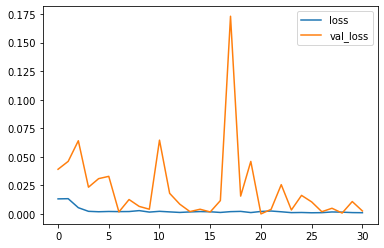

In [42]:
loss = pd.DataFrame(model.history.history)
loss.plot()

## Method 1 for prediction

In [43]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [44]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Avg_price,Predictions
Date,,
2021-06-01,124.645000,131.210033
2021-06-02,124.645001,131.400289
2021-06-03,123.989998,131.725954
2021-06-04,125.005001,132.177200
2021-06-07,125.575001,132.723891
...,...,...
2021-11-23,160.430001,148.372410
2021-11-24,160.889999,148.373828
2021-11-26,158.404999,148.375196


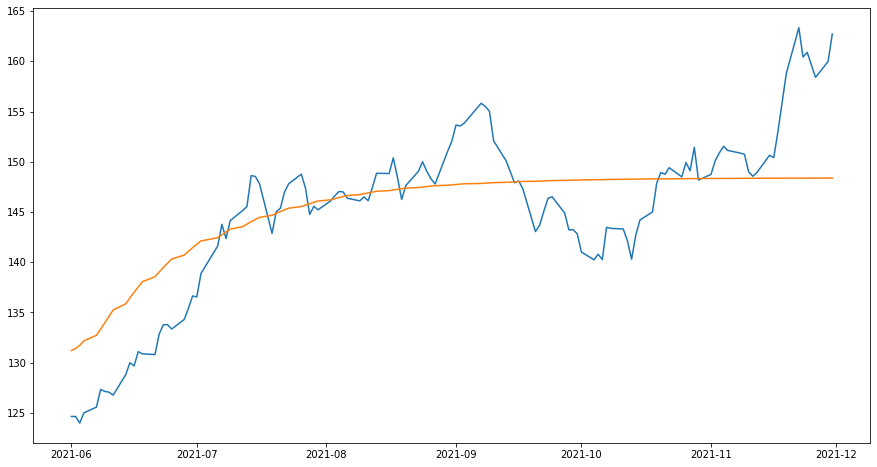

In [45]:
plt.figure(figsize=(15,8))
plt.plot(test)

### Calculate RMSE

In [46]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Avg_price'],test['Predictions']))

5.102561822420294

## Method 2 for prediction

In [49]:
data_test = test['Avg_price'].values
data_avg_price = data['Avg_price']
inputs = data_avg_price[len(data_avg_price) - test_size - 126:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(126, inputs.shape[0]):
    X_test.append(inputs[i-126:i, 0])
X_test = np.array(X_test)
X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
preds= model.predict(X_test)
preds = scaler.inverse_transform(preds)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


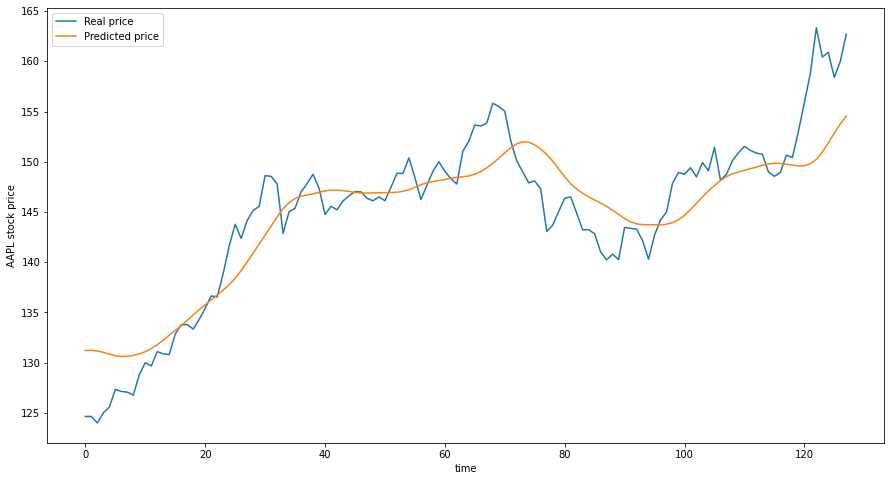

In [50]:
plt.figure(figsize=(15,8))
plt.plot(data_test, label = 'Real price')
plt.plot(preds, label = 'Predicted price')
plt.ylabel('AAPL stock price')
plt.xlabel('time')
plt.legend()
plt.show()

In [51]:
np.sqrt(mean_squared_error(test['Avg_price'],preds))

3.6854172786256063

## Forecasting using method 1 prediction

In [52]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

In [53]:
length = 126 
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=32)

In [54]:
from dateutil.parser import parse
from dateutil.rrule import rrule, DAILY, MO, TU, WE, TH, FR

result = rrule(
  DAILY,
  byweekday=(MO,TU,WE,TH,FR),
  dtstart=parse('2021-12-01'),
  until=parse('2022-05-31')
)
print(list(result))

[datetime.datetime(2021, 12, 1, 0, 0), datetime.datetime(2021, 12, 2, 0, 0), datetime.datetime(2021, 12, 3, 0, 0), datetime.datetime(2021, 12, 6, 0, 0), datetime.datetime(2021, 12, 7, 0, 0), datetime.datetime(2021, 12, 8, 0, 0), datetime.datetime(2021, 12, 9, 0, 0), datetime.datetime(2021, 12, 10, 0, 0), datetime.datetime(2021, 12, 13, 0, 0), datetime.datetime(2021, 12, 14, 0, 0), datetime.datetime(2021, 12, 15, 0, 0), datetime.datetime(2021, 12, 16, 0, 0), datetime.datetime(2021, 12, 17, 0, 0), datetime.datetime(2021, 12, 20, 0, 0), datetime.datetime(2021, 12, 21, 0, 0), datetime.datetime(2021, 12, 22, 0, 0), datetime.datetime(2021, 12, 23, 0, 0), datetime.datetime(2021, 12, 24, 0, 0), datetime.datetime(2021, 12, 27, 0, 0), datetime.datetime(2021, 12, 28, 0, 0), datetime.datetime(2021, 12, 29, 0, 0), datetime.datetime(2021, 12, 30, 0, 0), datetime.datetime(2021, 12, 31, 0, 0), datetime.datetime(2022, 1, 3, 0, 0), datetime.datetime(2022, 1, 4, 0, 0), datetime.datetime(2022, 1, 5, 0, 0)

In [55]:
list(result)

[datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2021, 12, 2, 0, 0),
 datetime.datetime(2021, 12, 3, 0, 0),
 datetime.datetime(2021, 12, 6, 0, 0),
 datetime.datetime(2021, 12, 7, 0, 0),
 datetime.datetime(2021, 12, 8, 0, 0),
 datetime.datetime(2021, 12, 9, 0, 0),
 datetime.datetime(2021, 12, 10, 0, 0),
 datetime.datetime(2021, 12, 13, 0, 0),
 datetime.datetime(2021, 12, 14, 0, 0),
 datetime.datetime(2021, 12, 15, 0, 0),
 datetime.datetime(2021, 12, 16, 0, 0),
 datetime.datetime(2021, 12, 17, 0, 0),
 datetime.datetime(2021, 12, 20, 0, 0),
 datetime.datetime(2021, 12, 21, 0, 0),
 datetime.datetime(2021, 12, 22, 0, 0),
 datetime.datetime(2021, 12, 23, 0, 0),
 datetime.datetime(2021, 12, 24, 0, 0),
 datetime.datetime(2021, 12, 27, 0, 0),
 datetime.datetime(2021, 12, 28, 0, 0),
 datetime.datetime(2021, 12, 29, 0, 0),
 datetime.datetime(2021, 12, 30, 0, 0),
 datetime.datetime(2021, 12, 31, 0, 0),
 datetime.datetime(2022, 1, 3, 0, 0),
 datetime.datetime(2022, 1, 4, 0, 0),
 datetime.d

In [56]:
len(list(result))

130

In [57]:
list(result)[0].strftime('%Y-%m-%d')

'2021-12-01'

In [58]:
forecast_date = []
for i in list(result):
  forecast_date.append(i.strftime('%Y-%m-%d'))

forecast_date = pd.Series(forecast_date)
forecast_date

0      2021-12-01
1      2021-12-02
2      2021-12-03
3      2021-12-06
4      2021-12-07
          ...    
125    2022-05-25
126    2022-05-26
127    2022-05-27
128    2022-05-30
129    2022-05-31
Length: 130, dtype: object

In [59]:
forecast_date = pd.to_datetime(forecast_date, dayfirst=True)
forecast_date

0     2021-12-01
1     2021-12-02
2     2021-12-03
3     2021-12-06
4     2021-12-07
         ...    
125   2022-05-25
126   2022-05-26
127   2022-05-27
128   2022-05-30
129   2022-05-31
Length: 130, dtype: datetime64[ns]

In [60]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 130

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [61]:
forecast = scaler.inverse_transform(forecast)
forecast_df = pd.DataFrame(data=forecast,index=forecast_date,
                           columns=['Forecast'])
forecast_df

,Forecast
2021-12-01,140.907455
2021-12-02,141.502670
2021-12-03,141.996549
2021-12-06,142.406847
2021-12-07,142.754087
...,...
2022-05-25,148.391515
2022-05-26,148.391916
2022-05-27,148.392283
2022-05-30,148.392650


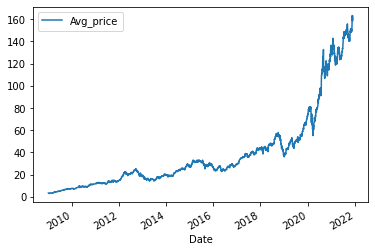

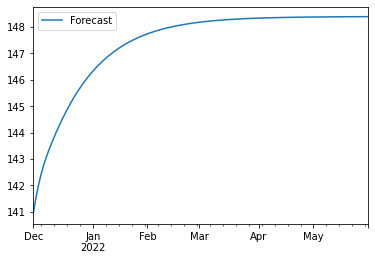

In [62]:
data.plot()
forecast_df.plot()

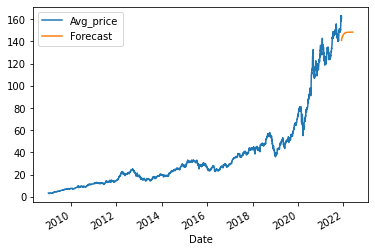

In [63]:
ax = data.plot()
forecast_df.plot(ax=ax)


(737791.0, 738306.0)

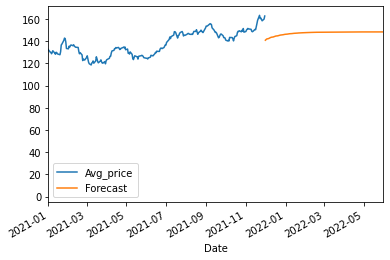

In [65]:
ax = data.plot()
forecast_df.plot(ax=ax)
plt.xlim('2021-01-01','2022-05-31')

In [66]:
model.save('AAPL_model.h5')